<a href="https://colab.research.google.com/github/wesleiferreira98/kNN-no-Instagram/blob/main/Projeto_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler, MaxAbsScaler, Normalizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

In [2]:
# URL do Google Drive
url = 'https://drive.google.com/uc?id=1MD0tpQI27v-Jmm9ZNFukUJPi0_KUn5_i'

# Caminho para salvar o arquivo temporariamente
output = '/tmp/top_insta_influencers_data.csv'

# Baixar o arquivo
gdown.download(url, output, quiet=False)

# Carregar o arquivo em um DataFrame
df = pd.read_csv(output)

# Exibindo as primeiras linhas do DataFrame para verificar
print(df.head())

Downloading...
From: https://drive.google.com/uc?id=1MD0tpQI27v-Jmm9ZNFukUJPi0_KUn5_i
To: /tmp/top_insta_influencers_data.csv
100%|██████████| 12.6k/12.6k [00:00<00:00, 2.90MB/s]

   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  


# implementação dos Algoritmos 

Aqui foi implementado forma de EDA que viza fornecer uma vizão mais clara acerca dos dados da base de informações.

         country  country_numeric
0          Spain                0
1  United States                0
2            NaN                0
3  United States                0
4  United States                0


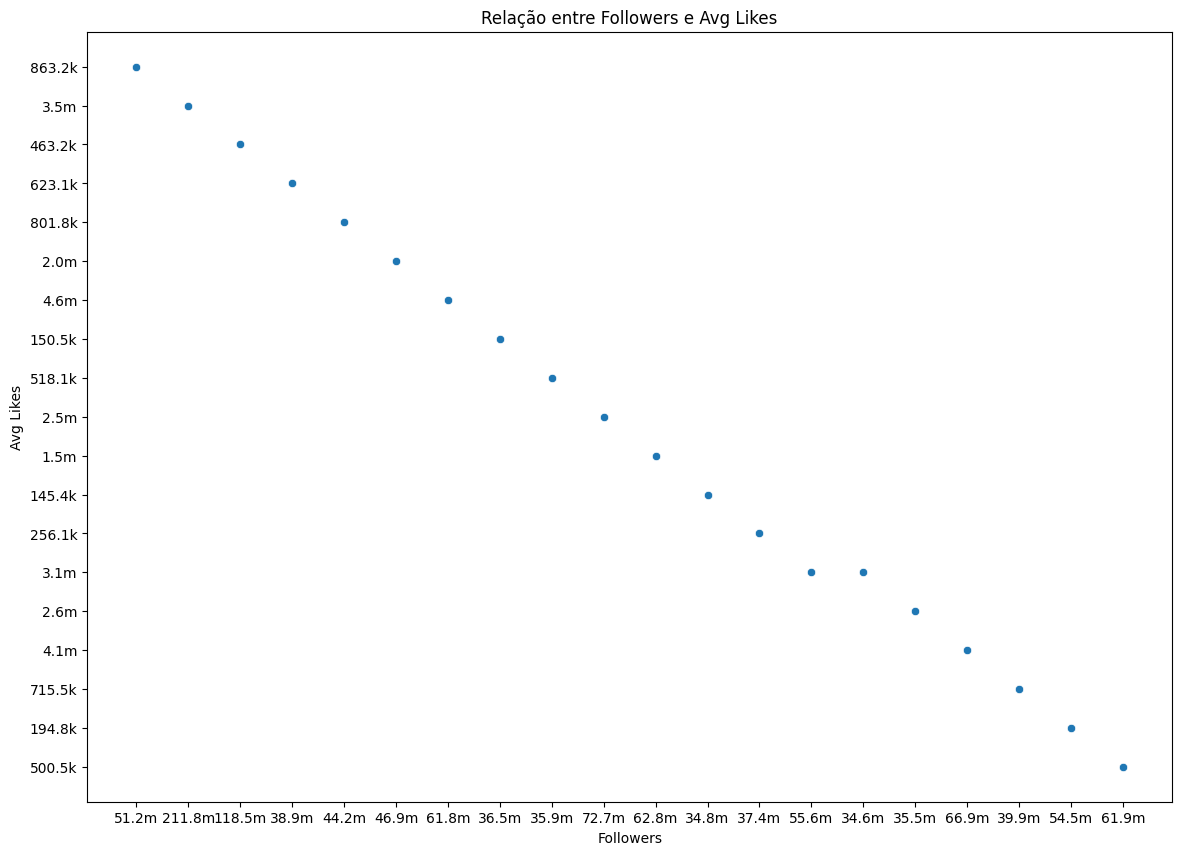

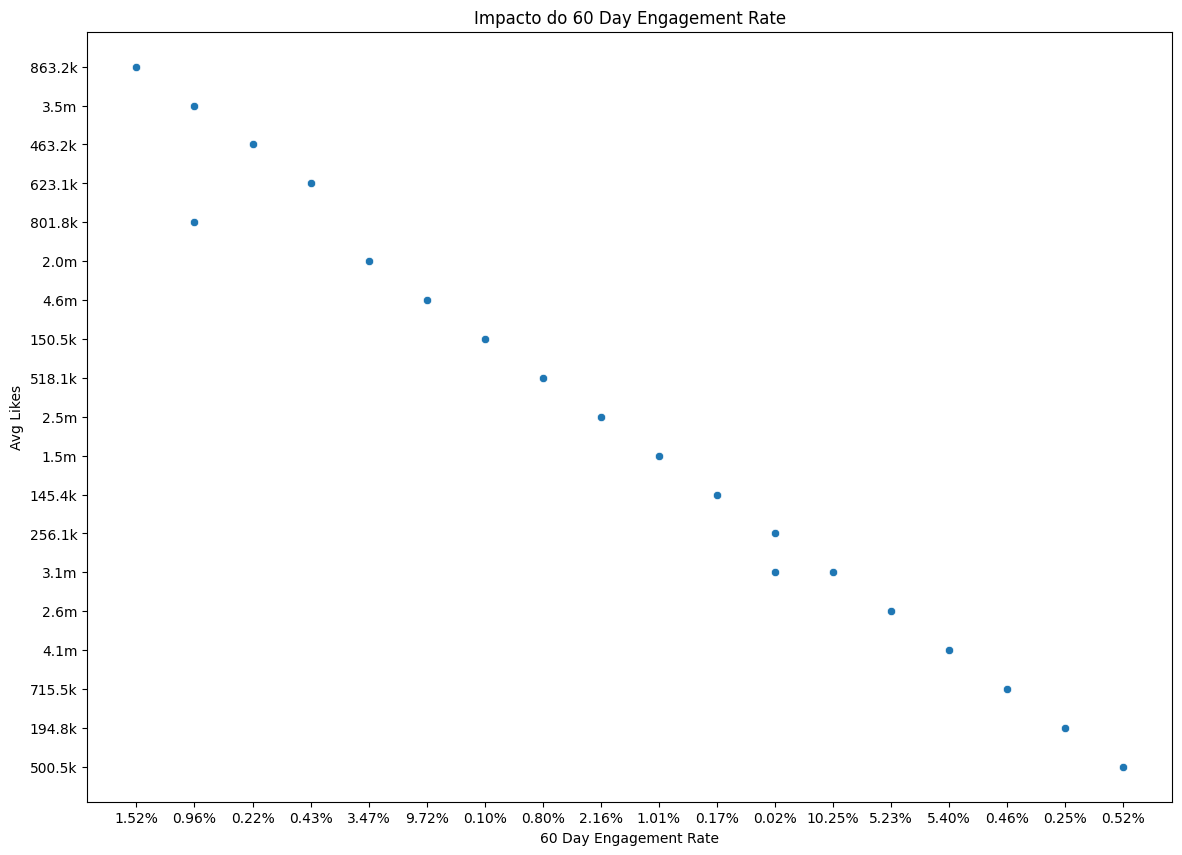

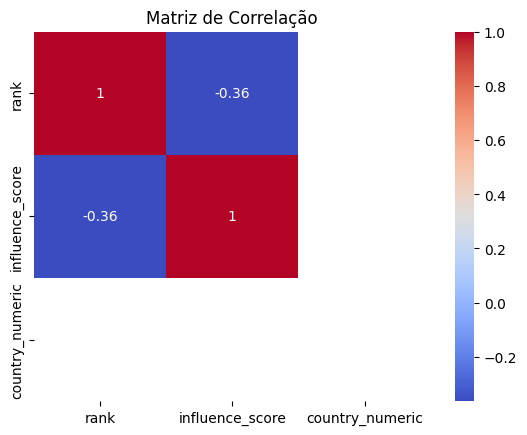

<Figure size 1400x1000 with 0 Axes>

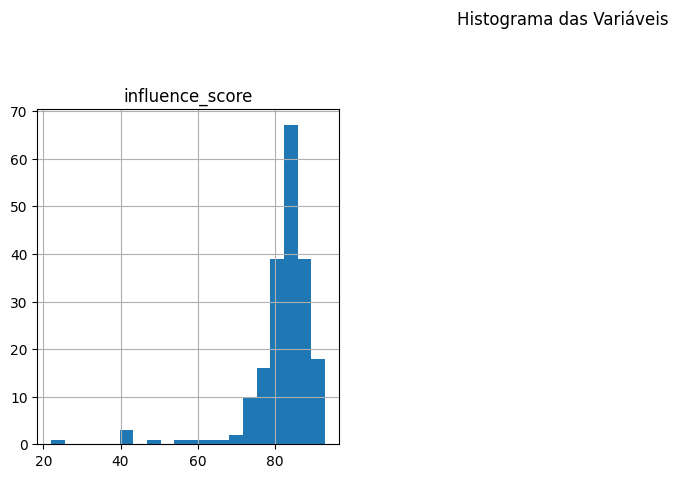

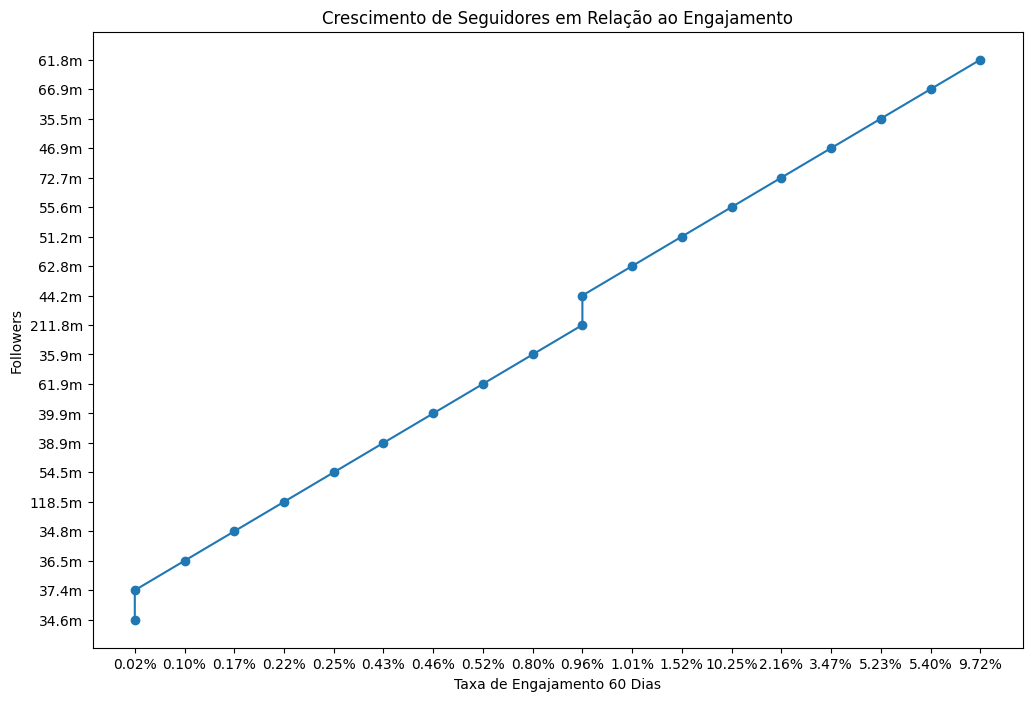

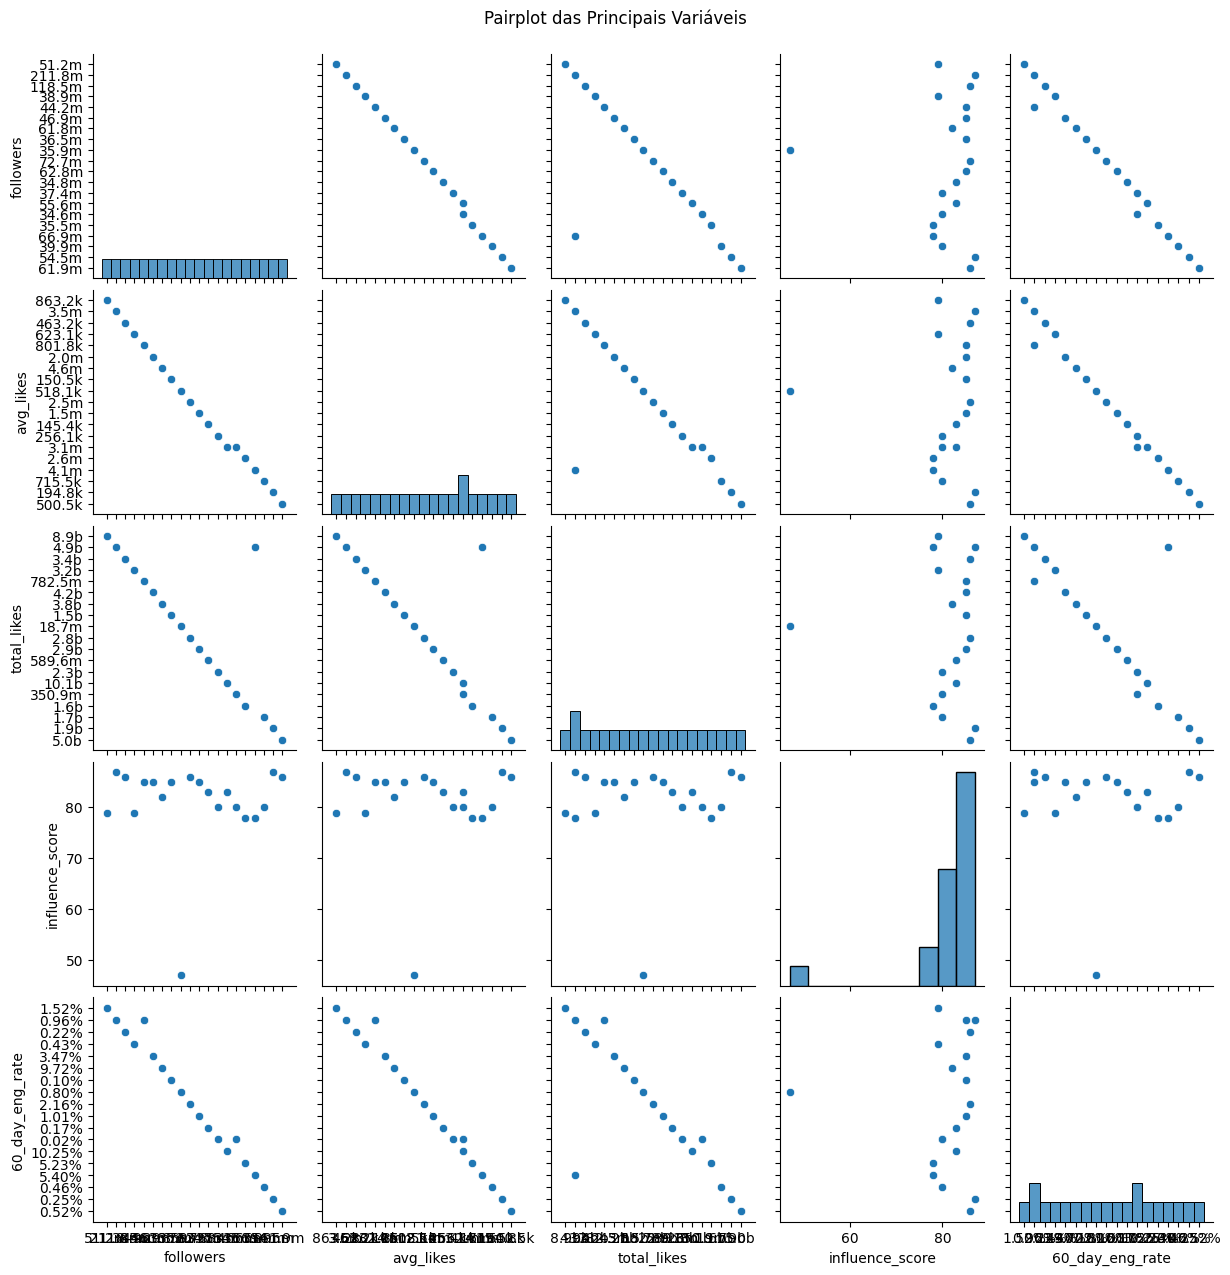

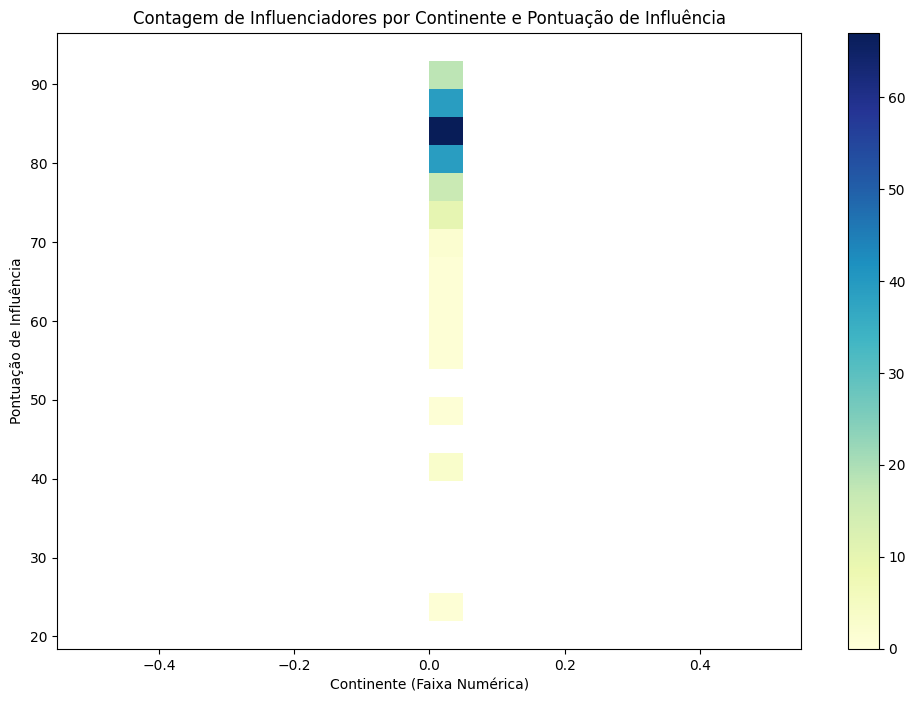

In [3]:
# Transformação de "country" em faixas numéricas por continente
continent_mapping = {
    'South America': (1, 9),
    'North America': (20, 29),
    'Europe': (40, 49),
    'Asia': (50, 59),
    'Africa': (60, 69),
    'Oceania': (70, 79)
}

# Função para mapear o país para o continente
def map_country_to_continent_range(country):
    # Verificar se o valor é nulo
    if pd.isnull(country):
        return 0  # Valor padrão para valores nulos

    # Ajustar o mapeamento com base no continente
    for continent, (start, end) in continent_mapping.items():
        if continent in country:  # Ajuste o critério conforme o necessário
            return np.random.randint(start, end + 1)
    return 0  # Valor padrão caso não encontre o país no mapeamento

# Aplicar a função
df['country_numeric'] = df['country'].apply(map_country_to_continent_range)

# Verificar a transformação
print(df[['country', 'country_numeric']].head())

sample_df = df.sample(frac=0.1,random_state=42)

# Análise Exploratória e Visualizações
plt.figure(figsize=(14,10))
sns.scatterplot(x='followers', y='avg_likes', data=sample_df)
plt.title('Relação entre Followers e Avg Likes')
plt.xlabel('Followers')
plt.ylabel('Avg Likes')
plt.show()

plt.figure(figsize=(14,10))
sns.scatterplot(x='60_day_eng_rate', y='avg_likes', data=sample_df)
plt.title('Impacto do 60 Day Engagement Rate')
plt.xlabel('60 Day Engagement Rate')
plt.ylabel('Avg Likes')
plt.show()

# Selecionar apenas colunas numéricas para a matriz de correlação
numeric_df = df.select_dtypes(include=[np.number])

# Calcular a matriz de correlação
correlation_matrix = numeric_df.corr()

# Visualizar a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


# Histograma das variávies principais
plt.figure(figsize=(14,10))
numeric_columns = ['followers', 'avg_likes', 'total_likes', '60_day_eng_rate', 'influence_score']
df[numeric_columns].hist(bins=20, figsize=(14,10), layout=(2,3))
plt.suptitle('Histograma das Variáveis')
plt.show()

#Gráfico de Linha de Crescimento de Seguidores (Followers)
df_sorted = sample_df.sort_values('60_day_eng_rate')  # Ordenar por engajamento
plt.figure(figsize=(12, 8))
plt.plot(df_sorted['60_day_eng_rate'], df_sorted['followers'], marker='o', linestyle='-')
plt.title('Crescimento de Seguidores em Relação ao Engajamento')
plt.xlabel('Taxa de Engajamento 60 Dias')
plt.ylabel('Followers')
plt.show()


#Pairplot para Visualizar Relações Múltiplas
sns.pairplot(sample_df, vars=['followers', 'avg_likes', 'total_likes', 'influence_score', '60_day_eng_rate'])
plt.suptitle('Pairplot das Principais Variáveis', y=1.02)
plt.show()

#Mapa de Calor de Contagem de Influenciadores por Continente e Pontuação de Influência
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='country_numeric', y='influence_score', bins=20, cbar=True, cmap='YlGnBu')
plt.title('Contagem de Influenciadores por Continente e Pontuação de Influência')
plt.xlabel('Continente (Faixa Numérica)')
plt.ylabel('Pontuação de Influência')
plt.show()






### Gráficos que exploram Country 

Nessa seção destacaremos outros gráficos que exploram a relação da variável "Country" com as variáveis de seguidores

#### Distribuição de Influenciadores por País
Um gráfico de barras que mostra a quantidade de influenciadores em cada país. Isso ajuda a visualizar onde estão concentrados os influenciadores.

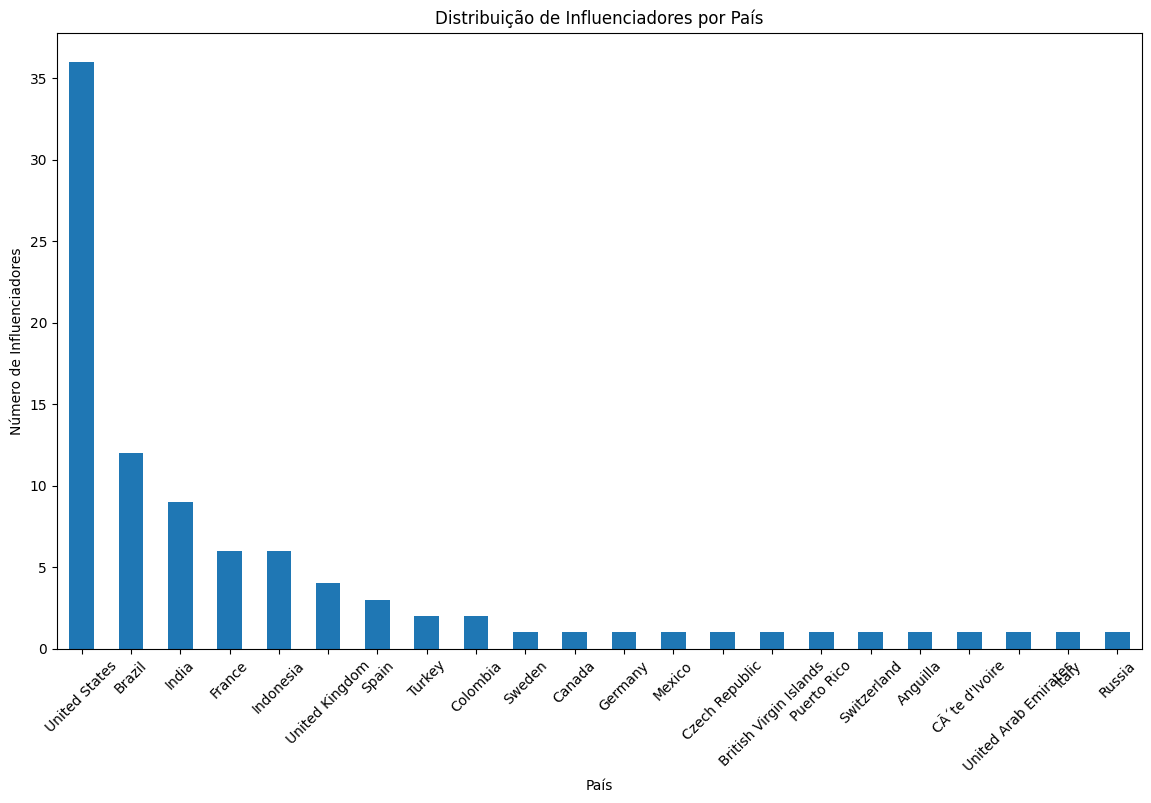

In [20]:
# Contagem de influenciadores por país
country_counts = df['country'].value_counts()

# Gráfico de barras
plt.figure(figsize=(14, 8))
country_counts.plot(kind='bar')
plt.title('Distribuição de Influenciadores por País')
plt.xlabel('País')
plt.ylabel('Número de Influenciadores')
plt.xticks(rotation=45)
plt.show()


#### Média de Seguidores por País
Para ver em quais países os influenciadores possuem mais seguidores, você pode calcular a média de seguidores por país e criar um gráfico de barras.

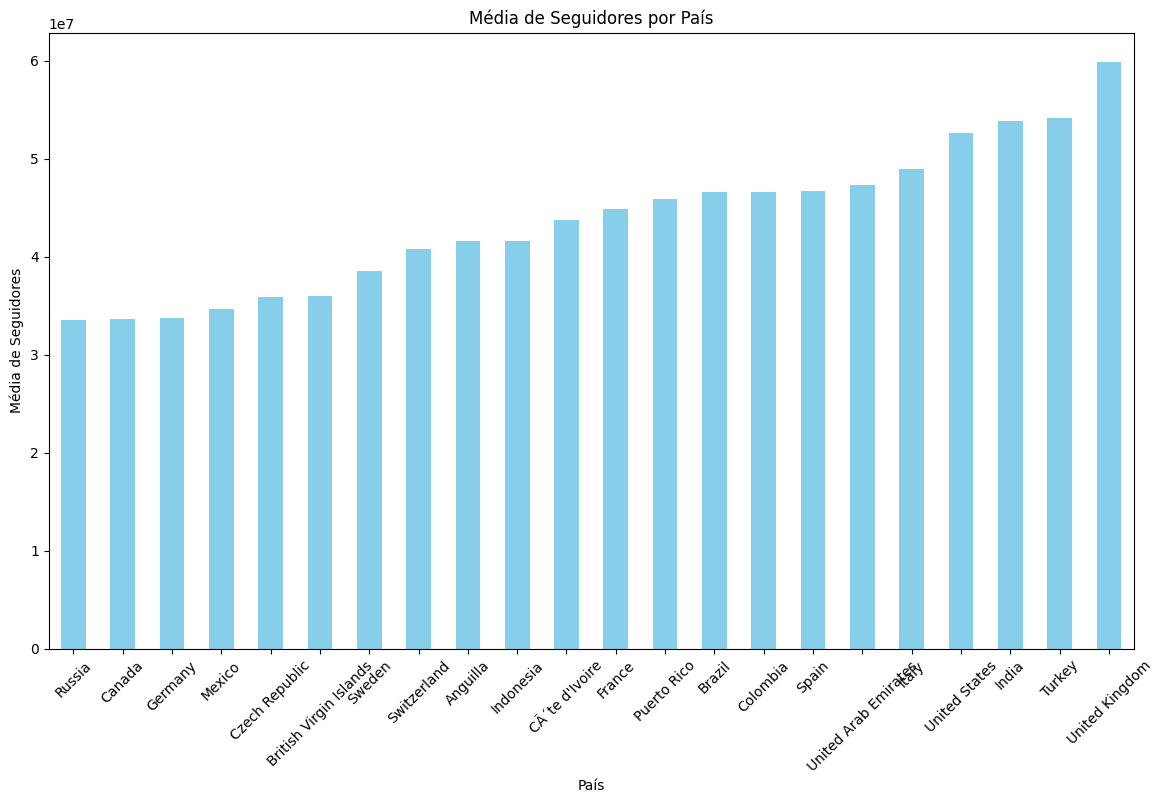

In [21]:
# Média de seguidores por país
avg_followers_per_country = df.groupby('country')['followers'].mean().sort_values()

# Gráfico de barras
plt.figure(figsize=(14, 8))
avg_followers_per_country.plot(kind='bar', color='skyblue')
plt.title('Média de Seguidores por País')
plt.xlabel('País')
plt.ylabel('Média de Seguidores')
plt.xticks(rotation=45)
plt.show()


#### Média de Likes por Post por País
Este gráfico pode ser feito para ver como o engajamento varia entre os países, considerando a métrica de likes por post.

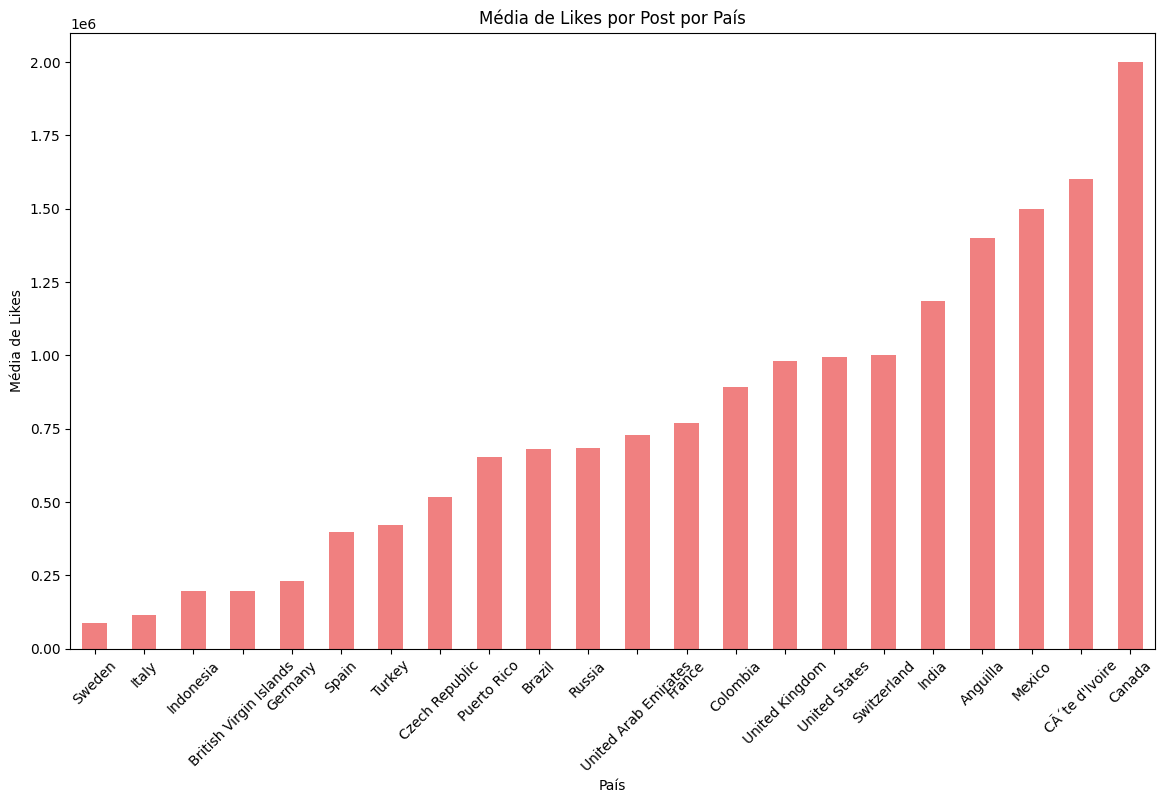

In [22]:
# Média de likes por post por país
avg_likes_per_country = df.groupby('country')['avg_likes'].mean().sort_values()

# Gráfico de barras
plt.figure(figsize=(14, 8))
avg_likes_per_country.plot(kind='bar', color='lightcoral')
plt.title('Média de Likes por Post por País')
plt.xlabel('País')
plt.ylabel('Média de Likes')
plt.xticks(rotation=45)
plt.show()


#### Correlação entre Seguidores e Engajamento por País
Um gráfico de dispersão que mostra a relação entre o número de seguidores e a taxa de engajamento de cada influenciador, com os pontos coloridos pelo país.

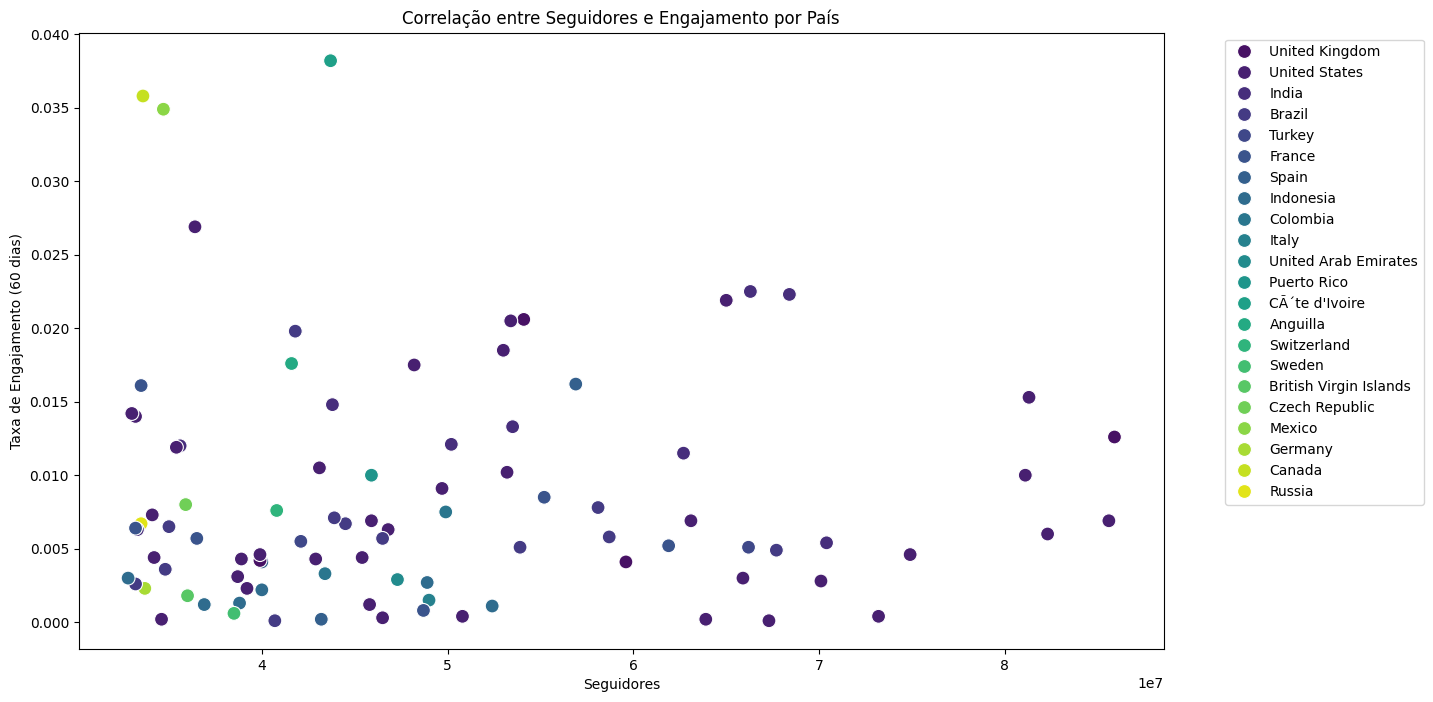

In [23]:
# Gráfico de dispersão de seguidores e engajamento por país
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='followers', y='60_day_eng_rate', hue='country', palette='viridis', s=100)
plt.title('Correlação entre Seguidores e Engajamento por País')
plt.xlabel('Seguidores')
plt.ylabel('Taxa de Engajamento (60 dias)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Taxa de Engajamento Média por País
Para ver onde os influenciadores têm maior taxa de engajamento, calcule a média do 60_day_eng_rate por país.

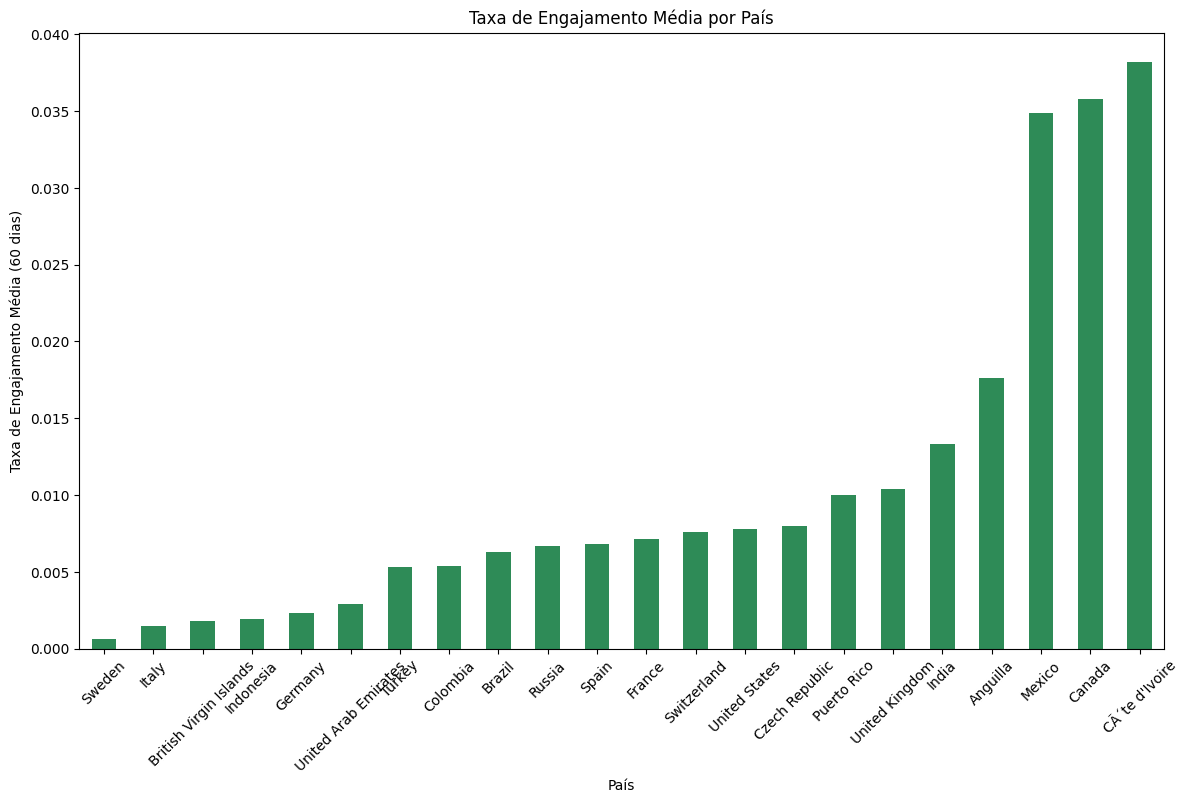

In [24]:
# Taxa de engajamento média por país
avg_engagement_per_country = df.groupby('country')['60_day_eng_rate'].mean().sort_values()

# Gráfico de barras
plt.figure(figsize=(14, 8))
avg_engagement_per_country.plot(kind='bar', color='seagreen')
plt.title('Taxa de Engajamento Média por País')
plt.xlabel('País')
plt.ylabel('Taxa de Engajamento Média (60 dias)')
plt.xticks(rotation=45)
plt.show()


#### Correlação entre Países e a Pontuação de Influência
Para observar se há diferenças significativas na pontuação de influência entre países, um box plot pode ser interessante.

/tmp/ipykernel_23616/3920232311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='country', y='influence_score', palette='Set2')


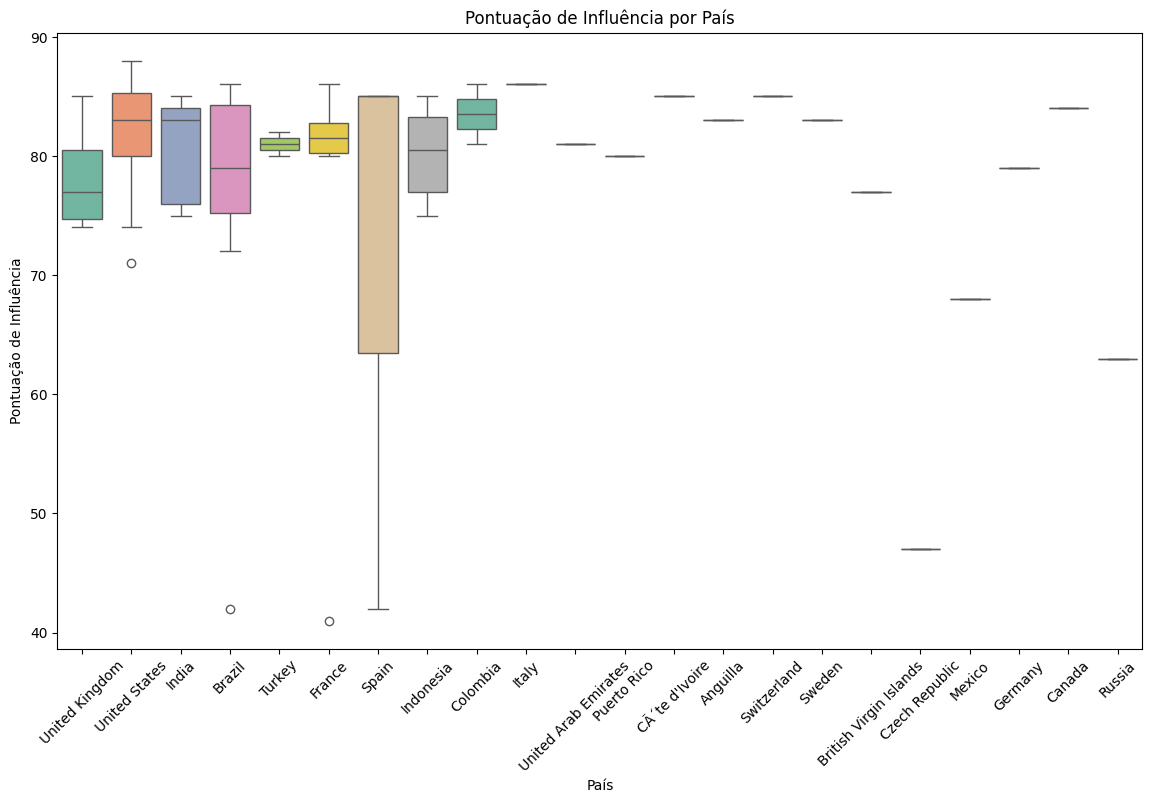

In [25]:
# Box plot da pontuação de influência por país
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='country', y='influence_score', palette='Set2')
plt.title('Pontuação de Influência por País')
plt.xlabel('País')
plt.ylabel('Pontuação de Influência')
plt.xticks(rotation=45)
plt.show()


#### Mapa de calor

Aqui é impresso um mapa de calor onde mostra quais países têm mais usuarios ativos 

In [ ]:
import pandas as pd
import plotly.express as px # type: ignore

# Contagem de influenciadores por país
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'influencer_count']

# Mapa de calor com Plotly
fig = px.choropleth(
    country_counts,
    locations="country",
    locationmode="country names",
    color="influencer_count",
    hover_name="country",
    color_continuous_scale="Viridis",
    title="Distribuição de Influenciadores por País"
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black")
fig.update_layout(coloraxis_colorbar=dict(title="Número de Influenciadores"))
fig.show()


# Pré-processamento dos dados

Aqui serão feitos os devidos tratamentos na base de dados antes de submeter a mesma ao treinmaneto do KNN

In [4]:
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'b' in value:
            return float(value.replace('b', '')) * 1_000_000_000
        elif 'm' in value:
            return float(value.replace('m', '')) * 1_000_000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1_000
    return float(value)

# Aplicar a conversão nas colunas
df['followers'] = df['followers'].apply(convert_to_numeric)
df['avg_likes'] = df['avg_likes'].apply(convert_to_numeric)
df['total_likes'] = df['total_likes'].apply(convert_to_numeric)

def convert_percentage_to_float(value):
    if isinstance(value, str) and '%' in value:
        return float(value.replace('%', '')) / 100
    return float(value)

# Aplicar a conversão na coluna '60_day_eng_rate'
df['60_day_eng_rate'] = df['60_day_eng_rate'].apply(convert_percentage_to_float)
df['60_day_eng_rate'] = df['60_day_eng_rate'].astype(float)  # Garantir que está como float

# Criar nova variável de interação
df['followers_x_engagement'] = df['followers'] * df['60_day_eng_rate']

# Remover outliers nas principais variáveis numéricas
# Define os limites para cada variável usando o IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers(df, ['followers', 'avg_likes', 'total_likes', 'followers_x_engagement'])

# Selecionar as features e o target
X = df[['followers', 'avg_likes', 'total_likes', 'country_numeric', 'followers_x_engagement']]
y = df['influence_score']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementação do KNN

Nessa seção dedicamos a implentação completa do KNN e no fim do treinamento as metricas MAE, MSE e RMSE são exibidas na tela.

Melhor k: 23, Melhor métrica de distância: euclidean
MAE: 8.299516908212562, MSE: 236.38087236574955, RMSE: 15.374682837891308


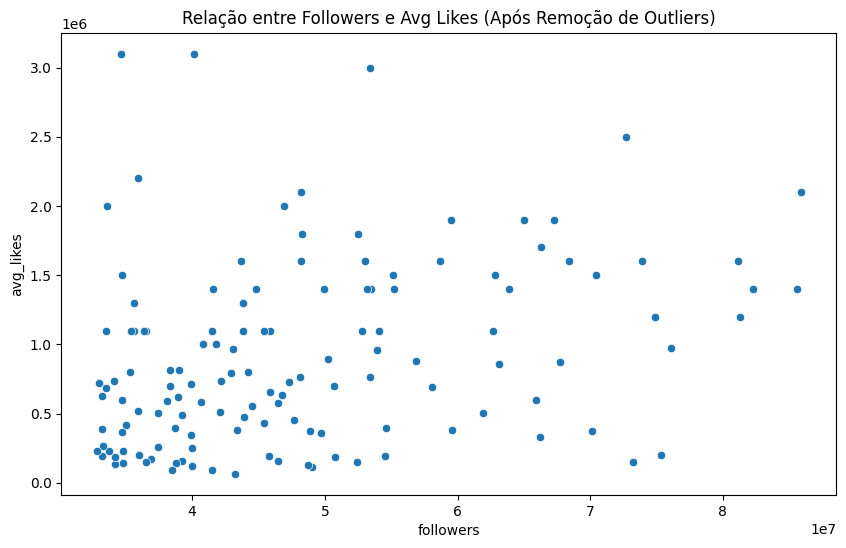

In [18]:
# Normalizar os dados com StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implementar o kNN
knn = KNeighborsRegressor()

# GridSearchCV para encontrar os melhores hiperparâmetros
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 19, 23,25], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Melhor modelo
best_knn = grid_search.best_estimator_
print(f"Melhor k: {grid_search.best_params_['n_neighbors']}, Melhor métrica de distância: {grid_search.best_params_['metric']}")

# Avaliar no conjunto de teste
y_pred = best_knn.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

# Visualização após remoção de outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='avg_likes', data=df)
plt.title('Relação entre Followers e Avg Likes (Após Remoção de Outliers)')
plt.show()

# Comparação com diferentes escalas 

Aqui separamos uma seção apenas para comparar os diferentes escalas


In [19]:
# Criar uma função para rodar o GridSearchCV com diferentes escalas
def evaluate_scaler(scaler, X_train, X_test, y_train, y_test):
    # Aplicar a escala escolhida
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Implementar o kNN com GridSearchCV para otimizar hiperparâmetros
    knn = KNeighborsRegressor()
    param_grid = {'n_neighbors': range(9, 21), 'metric': ['euclidean', 'manhattan']}
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    
    # Avaliar o melhor modelo no conjunto de teste
    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return best_knn, mae, mse, rmse

# Escala RobustScaler
robust_scaler = RobustScaler()
best_knn_robust, mae_robust, mse_robust, rmse_robust = evaluate_scaler(robust_scaler, X_train, X_test, y_train, y_test)
print("RobustScaler")
print(f"Melhor k: {best_knn_robust.n_neighbors}, Melhor métrica de distância: {best_knn_robust.metric}")
print(f"MAE: {mae_robust}, MSE: {mse_robust}, RMSE: {rmse_robust}")

# Escala MaxAbsScaler
maxabs_scaler = MaxAbsScaler()
best_knn_maxabs, mae_maxabs, mse_maxabs, rmse_maxabs = evaluate_scaler(maxabs_scaler, X_train, X_test, y_train, y_test)
print("\nMaxAbsScaler")
print(f"Melhor k: {best_knn_maxabs.n_neighbors}, Melhor métrica de distância: {best_knn_maxabs.metric}")
print(f"MAE: {mae_maxabs}, MSE: {mse_maxabs}, RMSE: {rmse_maxabs}")

# Escala Normalizer
normalizer = Normalizer()
best_knn_normalizer, mae_normalizer, mse_normalizer, rmse_normalizer = evaluate_scaler(normalizer, X_train, X_test, y_train, y_test)
print("\nNormalizer")
print(f"Melhor k: {best_knn_normalizer.n_neighbors}, Melhor métrica de distância: {best_knn_normalizer.metric}")
print(f"MAE: {mae_normalizer}, MSE: {mse_normalizer}, RMSE: {rmse_normalizer}")

/home/wesleiferreira/.local/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RobustScaler
Melhor k: 20, Melhor métrica de distância: euclidean
MAE: 8.118518518518519, MSE: 231.3807407407407, RMSE: 15.211204447404574

MaxAbsScaler
Melhor k: 18, Melhor métrica de distância: manhattan
MAE: 8.174897119341564, MSE: 229.4029492455418, RMSE: 15.146053916632603

Normalizer
Melhor k: 20, Melhor métrica de distância: manhattan
MAE: 8.053703703703704, MSE: 250.72416666666666, RMSE: 15.834271902006314


# Exibição extra de gráficos

Aqui resevamos uma seção para a exibição de outros gráficos 

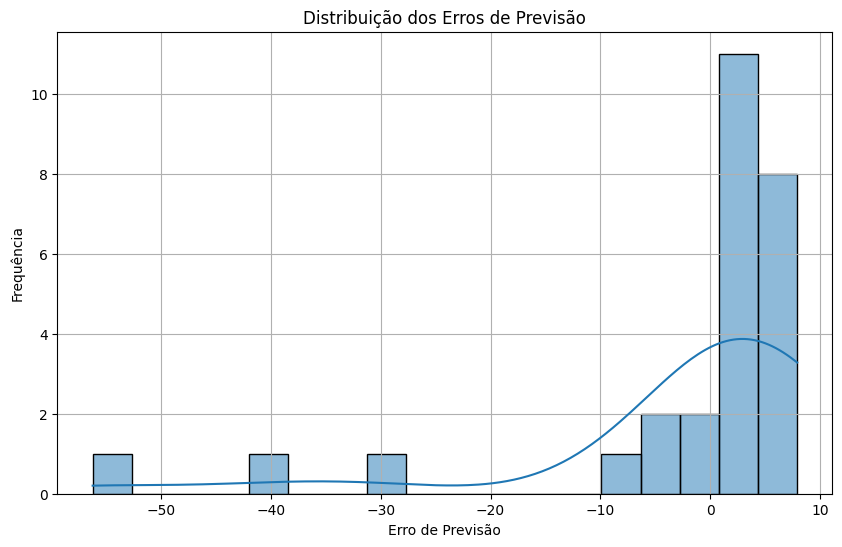

In [7]:
#Distribuição dos Erros de Previsão

# Calcular os erros de previsão
y_pred = best_knn.predict(X_test_scaled)
errors = y_test - y_pred

# Plotar o histograma dos erros
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title('Distribuição dos Erros de Previsão')
plt.xlabel('Erro de Previsão')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Gráfico de Dispersão: Previsões vs. Valores Reais
Este gráfico mostra a relação entre as previsões e os valores reais.

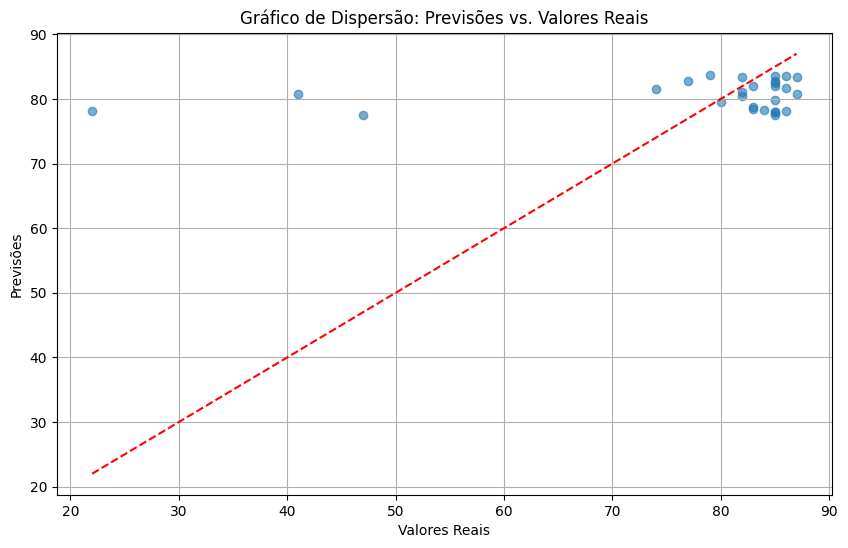

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Gráfico de Dispersão: Previsões vs. Valores Reais')
plt.grid(True)
plt.show()


# Curva de Validação Cruzada (Learning Curve)
Aqui, usamos learning_curve do sklearn.model_selection para verificar o desempenho conforme aumenta o número de dados de treinamento.

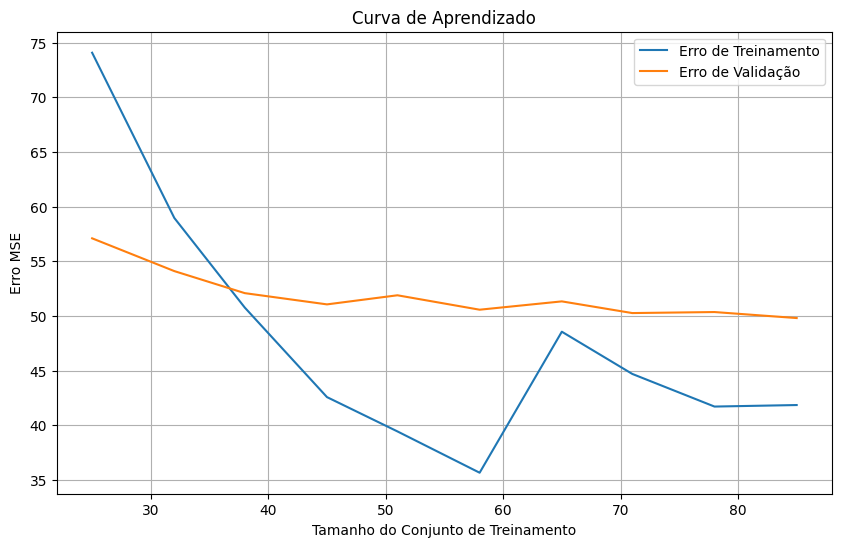

In [9]:
from sklearn.model_selection import learning_curve

# Ajustar `train_sizes` para evitar conjuntos de treinamento menores que `n_neighbors`
train_sizes, train_scores, test_scores = learning_curve(
    best_knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.3, 1.0, 10)  # Começa de 30% para garantir um tamanho adequado
)

# Calcular média e desvio padrão
train_errors = -train_scores.mean(axis=1)
test_errors = -test_scores.mean(axis=1)

# Plotar a curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Erro de Treinamento')
plt.plot(train_sizes, test_errors, label='Erro de Validação')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Erro MSE')
plt.title('Curva de Aprendizado')
plt.legend()
plt.grid(True)
plt.show()



# Curva de Erro vs. k (Número de Vizinhos)
Esse código realiza um loop sobre diferentes valores de k, treina o modelo, e calcula o erro de teste para cada valor de

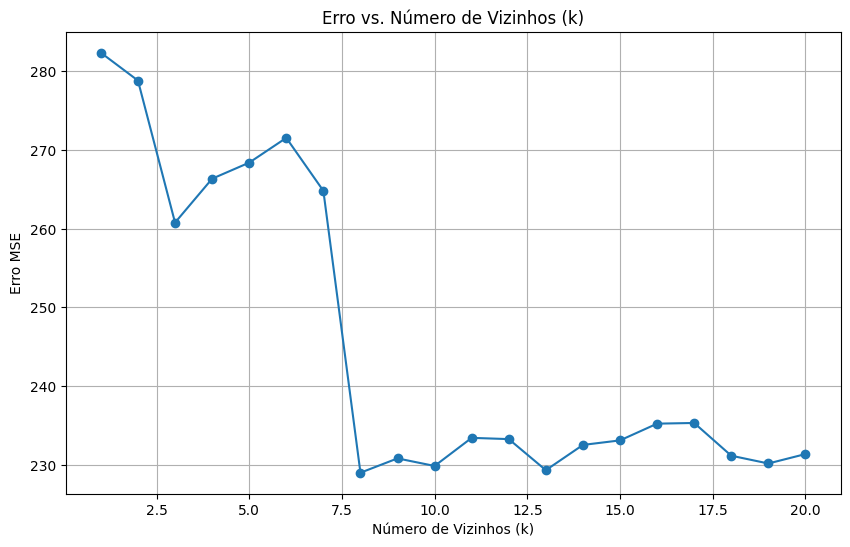

In [10]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Lista para armazenar os erros
errors = []
k_values = range(1, 21)  # Ajuste o intervalo conforme necessário

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='manhattan')  # Use a métrica que funcionou melhor
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# Plotar a curva de erro
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Erro vs. Número de Vizinhos (k)')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Erro MSE')
plt.grid(True)
plt.show()


# Comparação com outros modelos 

Aqui reservamos uma seção para comparar com os seus desempenhos com o KNN

### O Gradient Boosting Regressor (GBR)

É um modelo poderoso para problemas de regressão. Ele combina várias "árvores de decisão fracas" (modelos de aprendizado que cometem muitos erros individualmente) e ajusta sucessivamente esses erros para aprimorar a previsão.

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Inicializar o modelo Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Definir o espaço de parâmetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Configurar o GridSearchCV para encontrar os melhores hiperparâmetros
grid_search_gbr = GridSearchCV(
    gbr, param_grid, cv=5, scoring='neg_mean_squared_error'
)

# Treinar o modelo com os dados de treinamento
grid_search_gbr.fit(X_train_scaled, y_train)

# Melhor modelo e parâmetros encontrados
best_gbr = grid_search_gbr.best_estimator_
print("Melhores parâmetros:", grid_search_gbr.best_params_)

# Avaliar o modelo no conjunto de teste
y_pred_gbr = best_gbr.predict(X_test_scaled)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print(f"Gradient Boosting Regressor - MAE: {mae_gbr}, MSE: {mse_gbr}, RMSE: {rmse_gbr}")


Melhores parâmetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Gradient Boosting Regressor - MAE: 7.674226333845154, MSE: 242.23103768993366, RMSE: 15.563773247189566


### Regressão Linear

 É um modelo relativamente simples que assume uma relação linear entre as variáveis de entrada (features) e a variável de saída (target).

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Inicializar o modelo de Regressão Linear
lr = LinearRegression()

# Avaliar o modelo usando cross-validation
# Aqui usamos 'neg_mean_squared_error' para obter o MSE negativo
mse_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Ajustar o modelo ao conjunto de dados de treinamento
lr.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_lr = lr.predict(X_test_scaled)

# Calcular métricas de erro
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Resultados
print(f"Cross-Validation MSE médio (negativo): {np.mean(mse_scores)}")
print(f"Regressão Linear - MAE: {mae_lr}, MSE: {mse_lr}, RMSE: {rmse_lr}")


Cross-Validation MSE médio (negativo): -50.5251760953913
Regressão Linear - MAE: 7.902690862207465, MSE: 238.9031323429294, RMSE: 15.456491592302873


### Random Forest

 É uma técnica de ensemble que combina múltiplas árvores de decisão para melhorar a precisão e reduzir o overfitting

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar o modelo de Random Forest
rf = RandomForestRegressor(random_state=42)

# Ajustar o modelo ao conjunto de dados de treinamento
rf.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = rf.predict(X_test_scaled)

# Avaliar o desempenho com métricas de erro
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Resultados
print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}")


Random Forest - MAE: 7.358148148148148, MSE: 238.4643, RMSE: 15.442289338048294


#  Gráfico de Comparação de Modelos (Comparação de Métricas)

Aqui vamos comparar os desempenhos dos modelos testados até aqui 

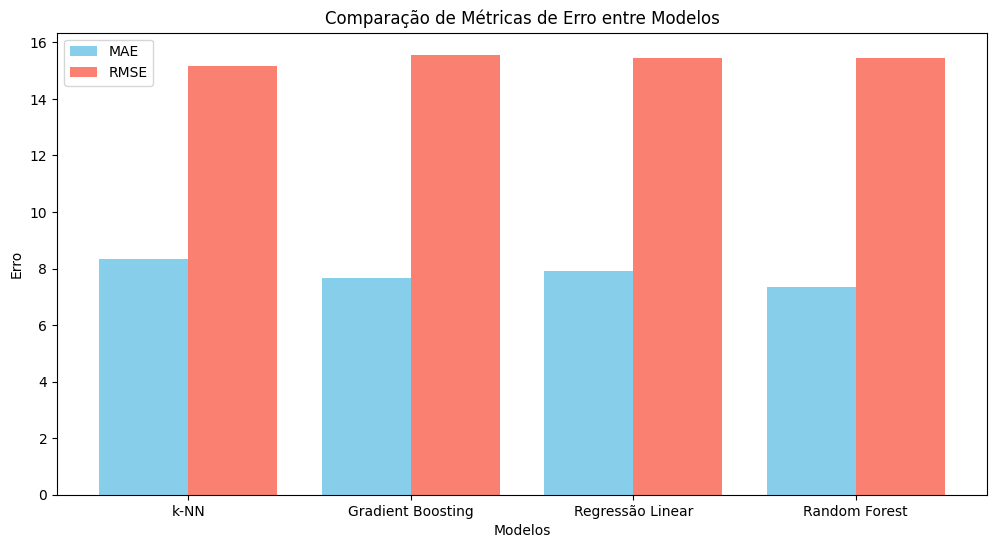

In [14]:
# Dados de exemplo com valores de erro de cada modelo (substitua com os valores obtidos)
models = ['k-NN', 'Gradient Boosting', 'Regressão Linear', 'Random Forest']
mae_scores = [mae, mae_gbr, mae_lr, mae_rf]  # Use suas variáveis de MAE aqui
rmse_scores = [rmse, rmse_gbr, rmse_lr, rmse_rf]  # Use suas variáveis de RMSE aqui

x = range(len(models))

plt.figure(figsize=(12, 6))
plt.bar(x, mae_scores, width=0.4, label='MAE', color='skyblue')
plt.bar([p + 0.4 for p in x], rmse_scores, width=0.4, label='RMSE', color='salmon')
plt.xlabel('Modelos')
plt.ylabel('Erro')
plt.title('Comparação de Métricas de Erro entre Modelos')
plt.xticks([p + 0.2 for p in x], models)
plt.legend()
plt.show()
